In [22]:
import numpy as np
import matplotlib.pyplot as plt
import os
from ipywidgets import interact, IntSlider

In [3]:
dp = "C:/Users/wangsx/Desktop/task/workspace/jhcode/npy/1.npy"

In [4]:
arr = np.load(dp)

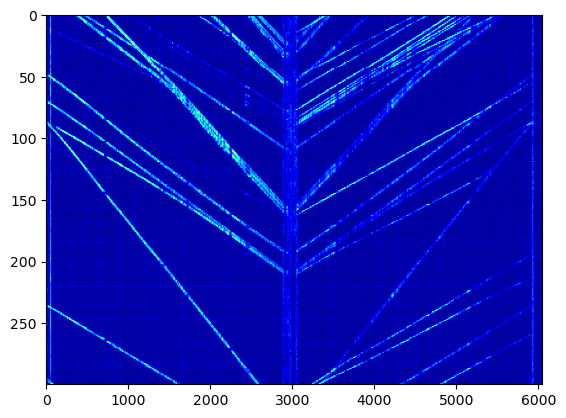

In [5]:
plt.imshow(arr, cmap='jet', aspect='auto')
plt.show()

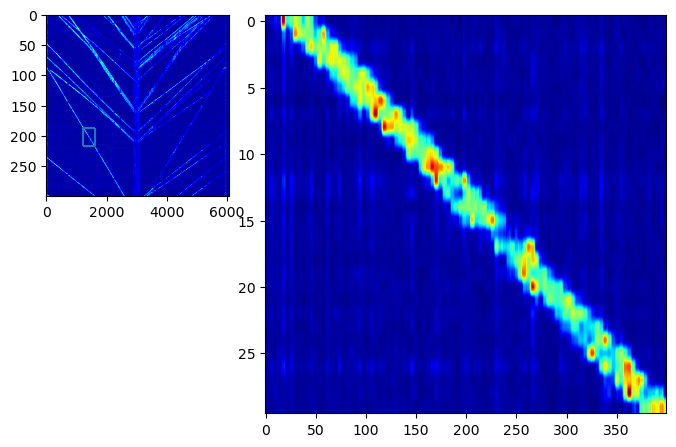

In [44]:
t = 187
b = 217
l = 1200
r = 1600
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(3, 3)
ax1 = fig.add_subplot(gs[0, 0])
ax1.hlines(t, l, r)
ax1.hlines(b, l, r)
ax1.vlines(l, t, b)
ax1.vlines(r, t, b)
ax1.imshow(arr, cmap='jet', aspect='auto')
ax2 = fig.add_subplot(gs[:2, 1:])
piece = arr[t:b, l:r]
ax2.imshow(piece, cmap='jet', aspect='auto')


In [45]:
def fun(i):
    plt.plot(piece[i])
    plt.ylim([0, 1.5])

interact(fun, i=IntSlider(0, max=28))

interactive(children=(IntSlider(value=0, description='i', max=28), Output()), _dom_classes=('widget-interact',…

<function __main__.fun(i)>

In [46]:
def fun1(i):
    plt.plot(piece[:, i], 'o--', markersize=3)
    plt.ylim([0, 1.5])

interact(fun1, i=IntSlider(0, max=399))

interactive(children=(IntSlider(value=0, description='i', max=399), Output()), _dom_classes=('widget-interact'…

<function __main__.fun1(i)>

In [ ]:
8 